In [1]:
from konlpy.tag import Okt
from collections import Counter
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib 
from IPython.display import set_matplotlib_formats
import numpy as np
from PIL import Image

In [2]:
# 토큰 str 불러오기
fr = open('../data/BlueHouse_Token.txt','r',encoding='CP949')
lists = fr.readlines()
fr.close()

In [3]:
# 토큰별 태그와 함께 튜플 리스트로 저장
okt = Okt()
morphs = []

for sentence in lists:
    morphs.append(okt.pos(sentence))

In [4]:
# 토큰 튜플 리스트 확인
print(morphs)

[[('저희', 'Noun'), ('아이', 'Noun'), ('아동학대', 'Noun'), ('관련', 'Noun'), ('자', 'Noun'), ('처벌', 'Noun'), ('정부', 'Noun'), ('교회', 'Noun'), ('정규', 'Noun'), ('예배', 'Noun'), ('이외', 'Noun'), ('행사', 'Noun'), ('금지', 'Noun'), ('취소', 'Noun'), ('임대차', 'Noun'), ('법', 'Noun'), ('소급', 'Noun'), ('적용', 'Noun'), ('주거지', 'Noun'), ('다시', 'Noun'), ('강제', 'Noun'), ('퇴거', 'Noun'), ('한강', 'Noun'), ('공원', 'Noun'), ('잠자리', 'Noun'), ('한지', 'Noun'), ('개월', 'Noun'), ('성범죄', 'Noun'), ('사건', 'Noun'), ('법적', 'Noun'), ('이상', 'Noun'), ('여성', 'Noun'), ('경찰', 'Noun'), ('판사', 'Noun'), ('전담', 'Noun'), ('수', 'Noun'), ('위례신도시', 'Noun'), ('북위', 'Noun'), ('례', 'Noun'), ('하남', 'Noun'), ('예정자', 'Noun'), ('대형', 'Noun'), ('건설', 'Noun'), ('사', 'Noun'), ('비정규직', 'Noun'), ('조직폭력배', 'Noun'), ('횡포', 'Noun'), ('국민', 'Noun'), ('신음', 'Noun'), ('주식', 'Noun'), ('양도소득세', 'Noun'), ('부과', 'Noun'), ('당장', 'Noun'), ('철회', 'Noun'), ('아파트', 'Noun'), ('분양', 'Noun'), ('가격', 'Noun'), ('반값', 'Noun'), ('분양', 'Noun'), ('주식', 'Noun'), ('양도소득세', 'Noun'), ('폭탄'

In [5]:
# 부적절한 토큰 제외하고 리스트로 저장
noun_adj_list = []

for tuples in morphs:
    for word, tag in tuples:
        if tag in ['Noun'] and ("대한" not in word) and ("적용" not in word) and ("및" not in word) and ("요청" not in word) \
        and ("위" not in word) and ("관련" not in word) and ("수" not in word) and ("것" not in word) and ("저" not in word) \
        and ("입" not in word) and ("재" not in word) and ("등" not in word) and ("무" not in word) and ("제" not in word) \
        and ("시오" not in word) and ("이" not in word) and ("중" not in word) and ("더" not in word) and ("피" not in word) \
        and ("비" not in word) and ("자" not in word) and ("고" not in word) and ("대해" not in word) and ("를" not in word) \
        and ("왜" not in word) and ("요구" not in word) and ("의" not in word) and ("위" not in word) and ("을" not in word) \
        and ("청" not in word) and ("한" not in word) and ("자" not in word) and ("단" not in word) and ("제" not in word) \
        and ("제" not in word) and ("층" not in word) and ("개선" not in word):
            noun_adj_list.append(word)

In [6]:
# 최종 토큰 리스트 확인
print(noun_adj_list)

['아동학대', '처벌', '정부', '교회', '정규', '예배', '행사', '금지', '취소', '임대차', '법', '소급', '주거지', '다시', '퇴거', '공원', '개월', '성범죄', '사건', '법적', '여성', '경찰', '판사', '전담', '례', '하남', '대형', '건설', '사', '조직폭력배', '횡포', '국민', '신음', '주식', '양도소득세', '부과', '당장', '철회', '아파트', '분양', '가격', '반값', '분양', '주식', '양도소득세', '폭탄', '과연', '전업', '사람', '삶', '투기', '지구', '로서', '대통령직', '소급', '가구', '주택', '주택', '금지', '특별법', '주택', '세금', '포함', '합산', '시일', '안', '희망', '부동산', '대책', '차량', '통행', '반려동물', '가족', '관계', '증명서', '추진', '임대차', '보호', '법', '소급', '개정', '임대차보호법', '임대차', '보호', '법', '소급', '우리', '떳', '다방', '채널', '승인', '취소', '가혹', '폭력', '사건', '은폐', '축소', '진실', '소보', '유치', '하라', '행정', '처리', '정해', '친일', '세력', '반영', '화폐', '인물', '변경', '인천공항', '시', '국민', '개인정보', '사적', '남용', '처벌', '군', '조카', '국방부', '대기업', '적폐', '서민', '생계', '서울', '복싱', '살', '성추행', '사건', '살', '딸', '남학생', '성추행', '배신', '목숨', '남편', '하나', '게', '죄', '철거', '합', '개인', '택시', '조합', '특별', '감사', '실시', '검찰총장', '윤석열', '해임', '사법부', '농간', '아버지', '충남', '당진', '살인', '사건', '상공', '처형', '김현미', '장관', '경질', 

In [7]:
# 토큰별 출연 횟수 dict 저장
count = Counter(noun_adj_list)
word_count = dict(count.most_common())

In [8]:
# 토큰별 출연 횟수 dict 확인
print(word_count)

{'부동산': 54, '주택': 46, '정책': 34, '처벌': 32, '대책': 32, '지역': 30, '소급': 29, '대출': 26, '분양': 23, '서민': 21, '국민': 20, '코로나': 20, '조정': 20, '정부': 19, '주식': 19, '투기': 19, '반대': 19, '철회': 17, '촉구': 16, '부동산대책': 16, '조사': 15, '임대': 15, '폐지': 14, '아파트': 13, '장관': 13, '대통령': 12, '법': 11, '사건': 11, '보호': 11, '국토부': 11, '개선': 11, '사회': 10, '불법': 10, '관리': 10, '검토': 10, '지정': 10, '대상': 10, '도세': 10, '취소': 9, '부과': 9, '사기': 9, '사업': 9, '마스크': 9, '방안': 9, '지원': 9, '국가': 9, '금지': 8, '건설': 8, '양도소득세': 8, '지구': 8, '가족': 8, '우리': 8, '병원': 8, '금융': 8, '사용': 8, '폭행': 8, '해결': 8, '거주': 8, '전면': 8, '횡포': 7, '행정': 7, '개인': 7, '직원': 7, '손정우': 7, '주민': 7, '산업': 7, '공개': 7, '시기': 7, '학교': 7, '학생': 7, '집값': 7, '계약': 7, '주식양도세': 7, '개': 7, '판사': 6, '폭력': 6, '시': 6, '대기업': 6, '집': 6, '마련': 6, '송환': 6, '일': 6, '처분': 6, '시행': 6, '진행': 6, '연기': 6, '조치': 6, '전환': 6, '거래': 6, '해외': 6, '차': 6, '지급': 6, '동물': 6, '시민': 6, '정규직': 6, '규정': 6, '법인': 6, '좀': 6, '다시': 5, '공원': 5, '과연': 5, '세금': 5, '개정': 5, '생계': 5, '서울': 5, '성추행'

In [9]:
# 워드클라우드 배경 이미지 불러오기
kor_mask = np.array(Image.open('../data/Korean_United_flag.png'))

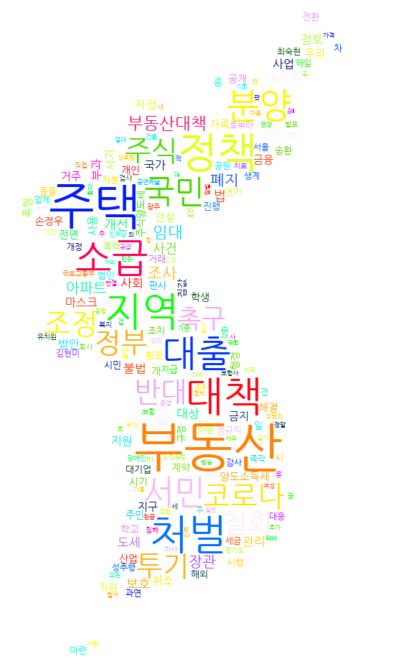

In [11]:
# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path='../data/NanumGothic.ttf',
                     colormap='gist_ncar', width=800, height=800, mask=kor_mask)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# 워드클라우드 png파일로 저장
wordcloud.to_file("../data/BlueHouseWordCloud.png")